# PACE Tutorial 1: Analysing Missingness in Synthetic APC Data – Interactive selection

## Introduction

This tutorial example focuses on the high-level functionality of PACE and uses a synthetic dataset that mirrors the missingness patterns that were found in an extract of an Admitted Patient Care (APC) dataset from Hospital Episode Statistics (HES).

**Objectives for this tutorial:**
  - Get a basic overview of PACE functionality for exploring missingness in data
  - Introduction to the interactive workflow and `PlotSession`
  - Explain unexpected patterns of missing data by using data mining techniques

<div class="alert alert-success"><b>Note: </b>To produce the expected results, this tutorial notebook requires you to interact with it in a few places.  When this is necessary, a box like this will let you know.</div>

## Preamble

### Includes: PACE and other libraries

In [1]:
from pace.membership import *
from pace.history import *
from pace.plots import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

Read the data into a Pandas dataframe, which can be read by PACE to explore the missingness of the data.

In [2]:
df = pd.read_csv("../../data/Synthetic_APC_DIAG_Fields.csv")

In [3]:
df.tail()

,DIAG_01,DIAG_02,DIAG_03,DIAG_04,DIAG_05,DIAG_06,DIAG_07,DIAG_08,DIAG_09,DIAG_10,ADMIAGE,ADMIMETH,Mortality,PROCODE3,SEX
195,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,65,0,abc,1
196,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,111,0,kkk,1
197,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,40,0,fff,2
198,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,65,0,abc,1
199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,111,0,ggg,2


## PACE Plotting session

The first step of use PACE is to create a `PlotSession` object.  A `PlotSession` can be constructed from a Pandas dataframe, as shown in the cell below:

In [4]:
session = PlotSession(df)

`PlotSession` is the core PACE class that provides the functionality to analyse and explore the missingness patterns found in a dataset. This can be done:
  - **programatically**, via several methods of the class;
  - with several **interactive plots** designed for use within a Jupyter notebook;
  - using a combination of these modes.

As this tutorial example will show, a `PlotSession` can be used to slice and select data and to create interactive plots. Moreover, the current session (including the interactive selections and active plots) can be saved and re-loaded, so that these do not have to be re-made when the notebook is restarted or shared.

To visualise the dataset, call `PlotSession.add_plot`, providing a name.

Naming the plot is important: It allows any interactive selection made in the plot to be referred to later.

In [5]:
session.add_plot(name="all data")

The result is a [Bokeh](https://docs.bokeh.org/en/latest/index.html) widget with a number of tabs, each with a different visualisation of the data missingness. All plots allow the user to make interactive selections. 

The tab that is selected when a plot is first added is the **Value bar chart**. It displays the number of missing values (y-axis) in each column (x-axis). Like any other visualization in PACE, it supports selection via the tap tool (left-click or `Shift` + left-click) and via box selection (click, drag and release).

This chart shows us that, as expected, the primary diagnosis field (`DIAG_01`) and the five categorical fields (`ADMIAGE`, `ADMIMETH`, `MORTALITY`, `PROCODE3` and `SEX`) are never missing. Further, the secondary diagnosis fields are missing progressively more often from `DIAG_02` to `DIAG_10`.

## Making a selection

To investigate missingness we make a new plot and call it "combinations". 
The *Combination heatmap* displays a matrix of fields on the x-axis and missing combinations on the y-axis. The number of records that are associated with each missing combination is encoded using a sequential colour
map (darker color indicates that a combination is missing more often).

<div class="alert alert-success"><b>Try it</b>: Run the code cell below and switch to the 'Combination heatmap' tab.</div>

In [30]:
session.add_plot(name="combinations")

It is expected in this dataset that if any diagnosis field from `DIAG_02` to `DIAG_10` is missing then all of
the subsequent diagnosis fields should also be missing. The Combination Heatmap above highlights that
this is indeed true for most of the missing records. However, there are also 7 unexpected missing combinations, which have gaps in the diagnosis fields.

<div class="alert alert-success"><b>Try it:</b> In the Combination heatmap plot above, use one of the interactive tools to select all rows (combinations) that have unexpected gaps.</div>

> <b>Hint</b>: If you made the suggested selection, the plot will look like the one in the Solution section at the end of this notebook.

We can retrieve the records present in the selection with `PlotSession.selected_records()`, passing the name of the selection.  Recall that our plot was named "combinations".

Notice that:
  - Even though we selected particular *missingness combinations* in the plot, `selected_records()` returns the indices of *records* in the dataframe that are present in the selection.  The indices returned refer to the original dataframe (`df` in our case).
  - The function takes a name of a selection as its argument: in this case it is the name of the plot where the selection was made.

In [31]:
gaps = session.selected_records("combinations")

`selected_records()` returns a boolean Pandas series which is `True` when the record is included in the selection and `False` otherwise:

In [32]:
gaps

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [33]:
print(f"{sum(gaps)} of {len(gaps)} records are included in the selection.")

15 of 200 records are included in the selection.


We can extract the full records from the original Pandas dataframe straightforwardly, if required:

In [34]:
df[gaps]

,DIAG_01,DIAG_02,DIAG_03,DIAG_04,DIAG_05,DIAG_06,DIAG_07,DIAG_08,DIAG_09,DIAG_10,ADMIAGE,ADMIMETH,Mortality,PROCODE3,SEX
131,1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,22,32,1,lll,1
132,1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,22,32,0,hhu,2
133,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,26,111,1,aaa,2
134,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,30,111,1,aaa,2
135,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,34,111,1,aaa,2
136,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21,111,1,aaa,2
137,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,28,111,1,aaa,2
138,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19,111,1,aaa,2
139,1,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,12,40,1,fff,1
140,1,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,10,32,1,abc,1


## Explaining unexpected missing combinations – Data mining

This section contains an example of how PACE can be combined with data mining methods to gain further insight into the missing data. 
The notebook `Information Gain Ratio.ipynb` contains helper functions to calculate the information gain ratio (IGR), which we will use for our example dataset. These helper functions are not part of the core PACE functionality, and illustrate how PACE can work alongside other libraries.

In [11]:
%run "Information Gain Ratio.ipynb"

We use the function `igr()` loaded from `Information Gain Ratio.ipynb`.

In [12]:
help(igr)

Help on function igr in module __main__:

igr(df_features: pandas.core.frame.DataFrame, target: pandas.core.series.Series) -> Dict[Any, float]
    Calculate the information gain ratio for each feature in a dataframe
    
    Parameters
    ----------
    df_features : Dataframe
        The features for which the information gain ratio will be calculated
    target : Series
        The targets for which the information gain ratio with each feature will be calculated
    
    Returns
    -------
    A dictionary of feature names to information gain ratio, for each feature in df_features.



`igr()` allows us to rank multiple columns (given by `igr_columns`) based on the correlation of their values with records that either are or
are not members of selected missing combinations (`gaps`).

In [13]:
igr_columns = ['ADMIAGE','ADMIMETH','Mortality','PROCODE3','SEX']
igr_result = igr(df[igr_columns], gaps)

If the suggested combinations have been selected from the combination heatmap, then `igr_result` should contain the following values for the IGR of each column:

 | Column      | IGR    |
 |-------------|--------|
 | `ADMIAGE`   | 0.0289 |
 | `ADMIMETH`  | 0.0232 |
 | `Mortality` | 0.0508 |
 | `PROCODE3`  | 0.0491 |
 | `SEX`       | 0.0302 |

In [14]:
igr_result

{'ADMIAGE': 0.0,
 'ADMIMETH': 0.0,
 'Mortality': 0.0,
 'PROCODE3': 0.0,
 'SEX': 0.0}

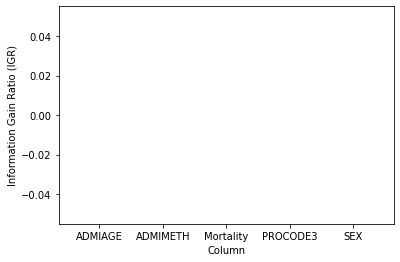

In [15]:
igr_result_sorted = dict(sorted(igr_result.items(), key=lambda kv: kv[1], reverse=True))

plt.bar(igr_result_sorted.keys(), igr_result_sorted.values())
plt.xlabel("Column")
plt.ylabel("Information Gain Ratio (IGR)")
plt.show()

## Identifying the cause of the missing data for a particular combination

TODO: Add some more explanation to this section

In [16]:
session.add_plot(name="gaps", based_on="combinations")

<div class="alert alert-success"><b>Try it</b><br />
In the plot above:
<ul>
  <li> Select the 'Combination heatmap' tab
  <li> Use one of the interactive tools to select the most common combination (the row with the darkest coloured boxes in the heatmap)</li>
</ul>
</div>

In [17]:
gaps_most_freq = session.selected_records("gaps", base_selection="combinations")

In [18]:
def entropy_table(feature: pd.Series, target: pd.Series) -> pd.DataFrame:
    df_target = pd.DataFrame({
        feature.name: feature,
        "_target": target,
    })
    df_split = (
        df_target
        .groupby(feature.name)
        .agg({"_target": ["sum", "count"]})
    )

    df_split[("_target", "p")] = (
        df_split[("_target", "sum")] / df_split[("_target", "count")]
    )

    p = df_split[("_target", "p")]
    df_split[("_target", "entropy")] = (p * np.log(1/p)).fillna(0.0)

    df_split.columns = df_split.columns.get_level_values(1)
        
    return df_split[["sum", "count", "entropy"]]

In [19]:
entropy_table(df.loc[gaps, "ADMIMETH"], gaps_most_freq)

,sum,count,entropy
ADMIMETH,,,
32,19,19,0.0
34,19,19,0.0
36,18,18,0.0
37,24,24,0.0
38,17,17,0.0
39,26,26,0.0
40,22,22,0.0
65,28,28,0.0
111,27,27,0.0


In [20]:
entropy_table(df.loc[gaps, "PROCODE3"], gaps_most_freq)

,sum,count,entropy
PROCODE3,,,
aaa,6,6,0.0
abc,24,24,0.0
aqw,7,7,0.0
fff,66,66,0.0
fgh,7,7,0.0
fgl,7,7,0.0
gfg,7,7,0.0
ggg,8,8,0.0
hhu,8,8,0.0


## Saving the session

If you were to re-run the notebook at this point, the interactive selection made in the Combination Heatmap above ("combinations") would be lost.  To avoid this, PACE can save any user-made selections to a file, and load it to restore the state of the session.

The following cell will write the current selections in every plot in the session to the indicated json file.

In [21]:
session.save("tutorial_example_session.json")

This file can be re-loaded into a PlotSession object, or shared with others along with the notebook and any data it uses.

<div class="alert alert-success">
Try replacing the code in input cell 3 of this notebook (the cell named '<tt>In [3]</tt>' if it has been run from the start) with
    
    session = PlotSession(df, session_file="tutorial_example_session.json")
    
then restarting the notebook kernel and re-running it from the beginning.  The interactive selections you made within the plot will be restored.
</div>

## Solution

The following PlotSession is pre-populated with the suggested selection of combinations for the "combination" heatmap plot.

In [22]:
session_solution = PlotSession(df, session_file="tutorial_example_session_solution.json")

In [23]:
session_solution.add_plot(name="combinations")

In [24]:
solution_gaps = session_solution.selected_records("combinations")
igr_columns = ['ADMIAGE','ADMIMETH','Mortality','PROCODE3','SEX']

In [25]:
igr_result_solution = igr(df[igr_columns], solution_gaps)
igr_result_solution

{'ADMIAGE': 0.028854122455544716,
 'ADMIMETH': 0.02328931382415494,
 'Mortality': 0.05078997103514674,
 'PROCODE3': 0.049110757617442075,
 'SEX': 0.03024365778589329}

In [26]:
session_solution.add_plot(name="gaps", based_on="combinations")

In [27]:
gaps_most_freq_solution = session_solution.selected_records("gaps", base_selection="combinations")

In [28]:
entropy_table(df.loc[solution_gaps, "ADMIMETH"], gaps_most_freq_solution)

,sum,count,entropy
ADMIMETH,,,
32,0,4,0.0
36,0,1,0.0
37,0,1,0.0
40,0,2,0.0
65,0,1,0.0
111,6,6,0.0


In [29]:
entropy_table(df.loc[solution_gaps, "PROCODE3"], gaps_most_freq_solution)

,sum,count,entropy
PROCODE3,,,
aaa,6,6,0.0
abc,0,2,0.0
fff,0,3,0.0
hhu,0,1,0.0
kkk,0,2,0.0
lll,0,1,0.0
